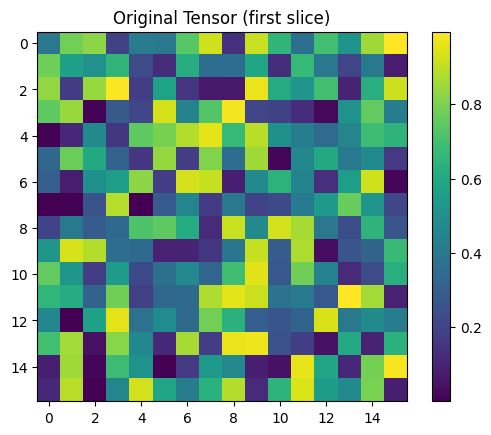

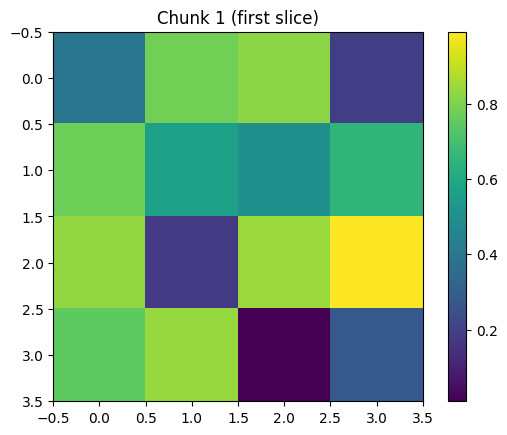

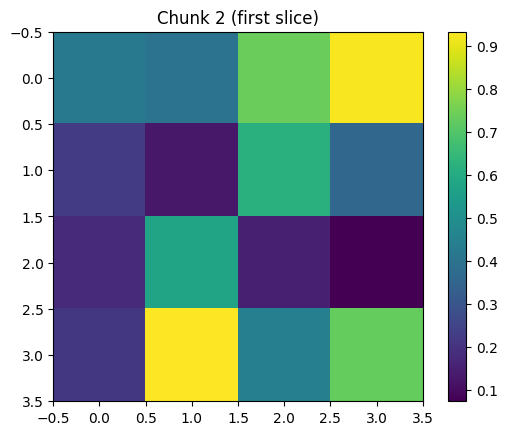

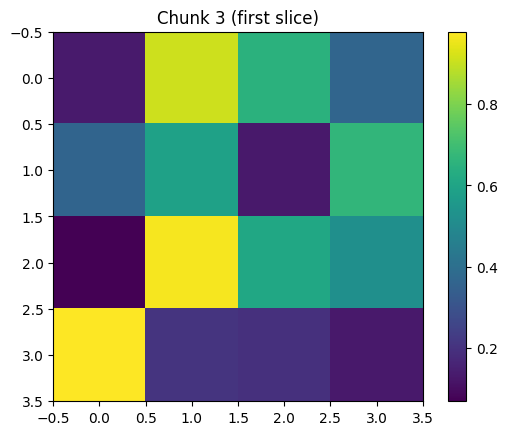

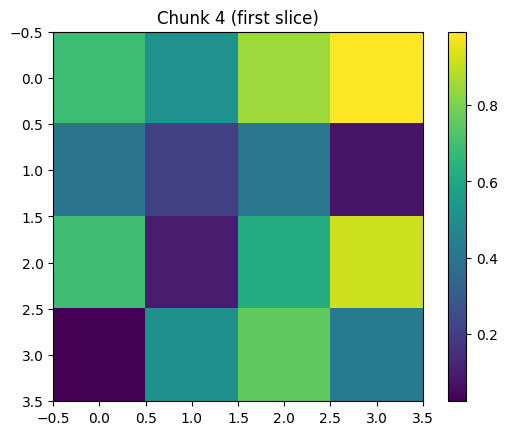

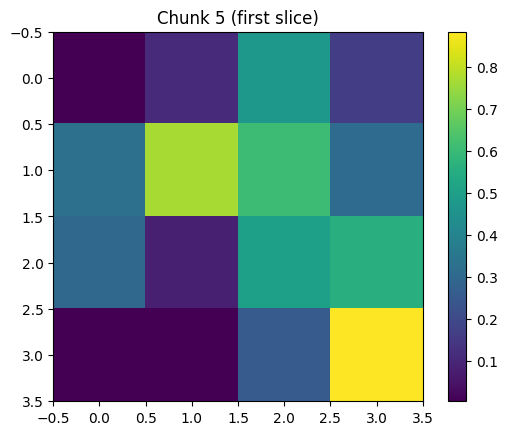

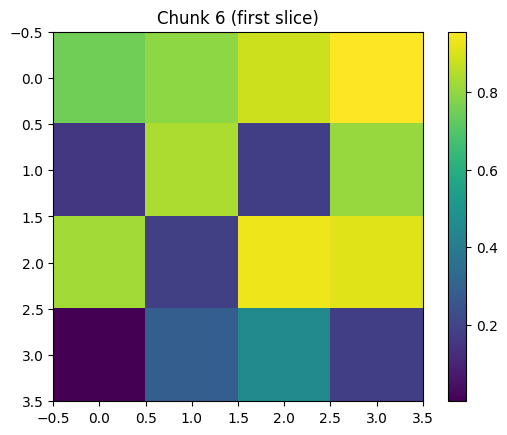

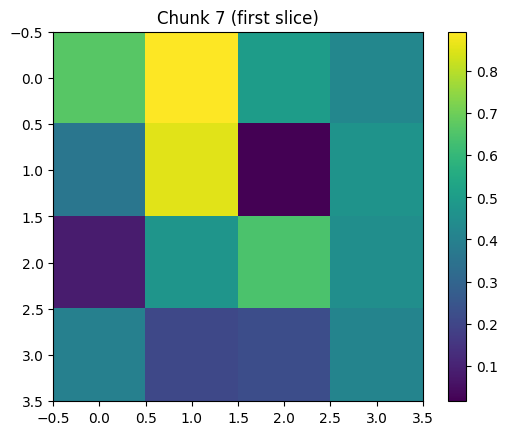

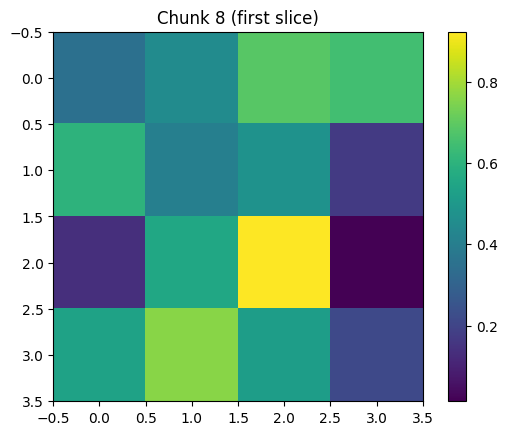

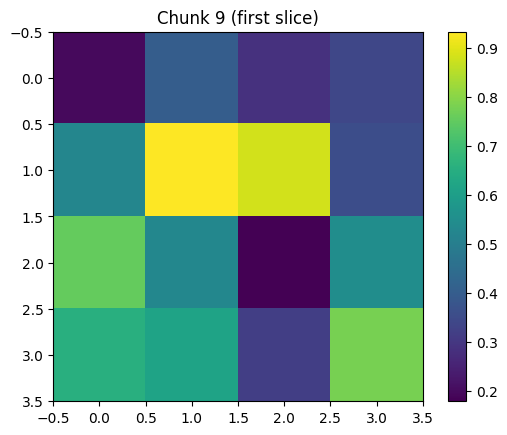

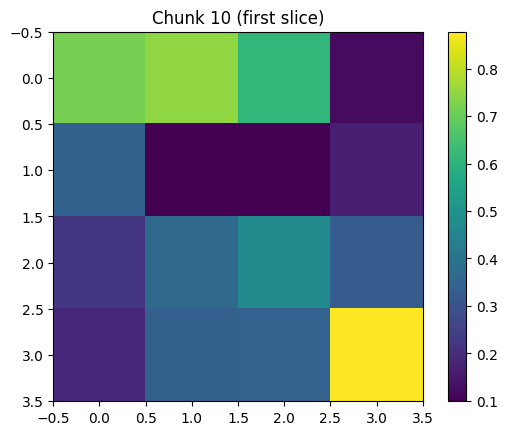

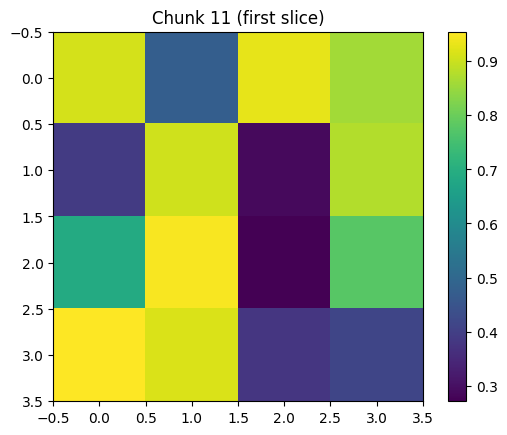

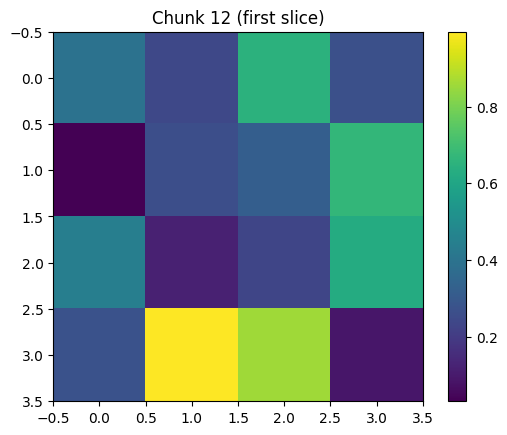

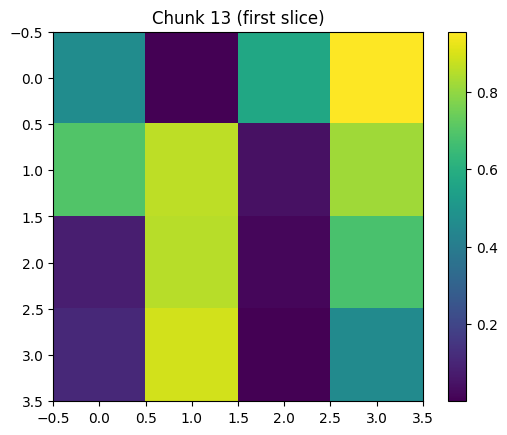

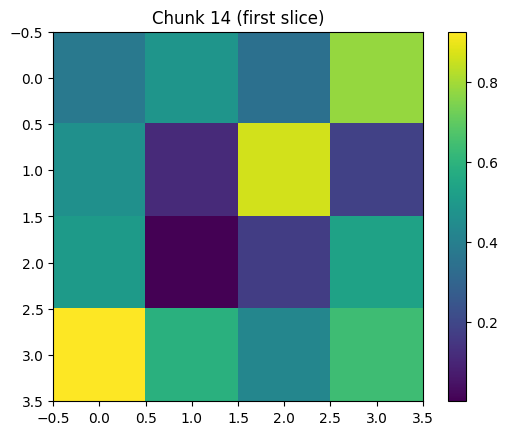

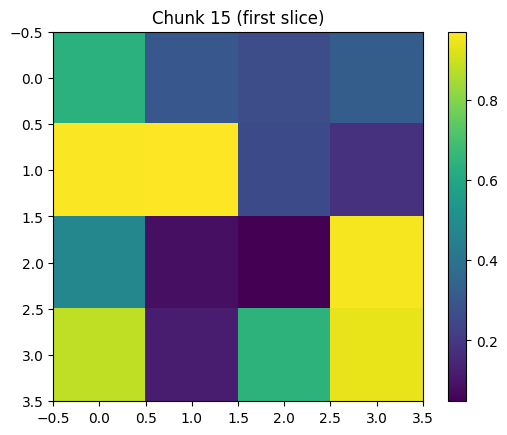

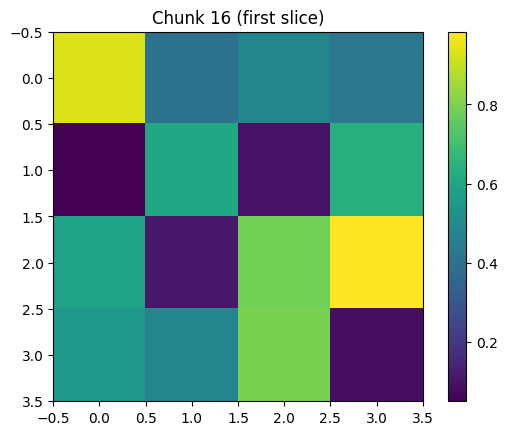

In [16]:
import torch
from typing import List, Tuple
import matplotlib.pyplot as plt

def split_tensor(tensor: torch.Tensor, chunk_dims: Tuple[int, ...]) -> List[torch.Tensor]:
    """
    Splits a 4-dimensional tensor into smaller chunks with the specified dimensions.
    """
    # Check if the chunk_dims are valid
    for i, chunk_dim in enumerate(chunk_dims):
        if tensor.size(i + 1) % chunk_dim != 0:
            raise ValueError(f"Tensor size at dimension {i+1} is not divisible by chunk_dim {chunk_dim}")

    # Split the tensor along each dimension based on chunk_dims
    chunks = [tensor]
    for i, chunk_dim in enumerate(chunk_dims):
        chunks = [chunk.chunk(tensor.size(i + 1) // chunk_dim, i + 1) for chunk in chunks]
        # Flatten the list of chunks
        chunks = [item for sublist in chunks for item in sublist]

    return chunks

def plot_tensor(tensor: torch.Tensor, title: str = "Tensor Plot") -> None:
    """
    Plots a tensor using Matplotlib.
    """
    plt.imshow(tensor.numpy(), cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Create a random 4D tensor with shape (16, 16, 16, 16)
    original_tensor = torch.rand((16, 16, 16))

    # Split the tensor into chunks with dimensions (4, 4, 4)
    chunks = split_tensor(original_tensor, ( 4, 4))

    # Plot the original tensor (we will plot the first slice for visualization)
    plot_tensor(original_tensor[0,  :, :], "Original Tensor (first slice)")

    # Plot each chunk (we will plot the first slice of each chunk for visualization)
    for i, chunk in enumerate(chunks):
        plot_tensor(chunk[0,  :, :], f"Chunk {i + 1} (first slice)")


In [ ]:
def split_tensor(tensor: torch.Tensor, chunk_dims: Tuple[int, ...]) -> List[torch.Tensor]:
    """
    Splits a 4-dimensional tensor into smaller chunks with the specified dimensions.

    Args:
        tensor (torch.Tensor): A 4-dimensional tensor to split.
        chunk_dims (Tuple[int, ...]): Dimensions of the chunks, should be 1 to 3 dimensions.

    Returns:
        List[torch.Tensor]: A list of smaller tensor chunks.

    Raises:
        ValueError: If chunk_dims are not within 1 to 3 dimensions.
        ValueError: If chunk_dims do not divide the tensor dimensions evenly.
    """
    if not (1 <= len(chunk_dims) <= 3):
        raise ValueError("Chunk dimensions must be between 1 and 3.")

    if any(td % cd != 0 for cd, td in zip(chunk_dims, tensor.shape[1:])):
        raise ValueError("Chunk dimensions must divide tensor dimensions evenly.")

    # Calculate the number of chunks for each dimension
    num_chunks = tuple(td // cd for cd, td in zip(chunk_dims, tensor.shape[1:]))

    # Split the tensor into smaller chunks
    chunks = tensor.split(chunk_dims[0], dim=1)
    if len(chunk_dims) > 1:
        chunks = [chunk.split(chunk_dims[1], dim=2) for chunk in chunks]
        chunks = [item for sublist in chunks for item in sublist]
    if len(chunk_dims) > 2:
        chunks = [chunk.split(chunk_dims[2], dim=3) for chunk in chunks]
        chunks = [item for sublist in chunks for item in sublist]

    return chunks


def plot_tensor(tensor: torch.Tensor, title: str = "Tensor Plot") -> None:
    """
    Plots a tensor using Matplotlib.
    """
    plt.imshow(tensor[0].numpy(), cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Create a random 4D tensor with shape (16, 16, 16, 16)
    original_tensor = torch.rand((16, 16, 16, 16))

    # Split the tensor into chunks with dimensions (4, 4, 4)
    chunks = split_tensor(original_tensor, (4,  4,4))

    # Plot the original tensor (we will plot the first slice for visualization)
    plot_tensor(original_tensor[0, :, :, :], "Original Tensor (first slice)")

    # Plot each chunk (we will plot the first slice of each chunk for visualization)
    for i, chunk in enumerate(chunks):
        plot_tensor(chunk[0, :, :, :], f"Chunk {i + 1} (first slice)")


In [ ]:
import torch
import torchaudio
from typing import Dict

def extract_audio_features(waveform: torch.Tensor) -> Dict[str, torch.Tensor]:
    """
    Extract various audio features from a waveform tensor.

    Args:
        waveform (torch.Tensor): Waveform tensor of shape (batch, samples)

    Returns:
        features (Dict[str, torch.Tensor]): Dictionary containing the extracted audio features
    """
    features = {}

    # FFT (Fast Fourier Transform)
    fft = torch.fft.fft(waveform)
    features['fft'] = fft

    # MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = torchaudio.transforms.MFCC()(waveform)
    features['mfcc'] = mfcc

    # LFCC (Linear-Frequency Cepstral Coefficients)
    lfcc = torchaudio.transforms.LFCC()(waveform)
    features['lfcc'] = lfcc

    # PLP (Perceptual Linear Prediction)
    plp = torchaudio.transforms.PLP()(waveform)
    features['plp'] = plp

    # LPCC (Linear Prediction Cepstral Coefficients)
    lpcc = torchaudio.transforms.LPCC()(waveform)
    features['lpcc'] = lpcc

    # Chroma Features
    chroma = torchaudio.transforms.Chroma()(waveform)
    features['chroma'] = chroma

    # Spectral Contrast
    spectral_contrast = torchaudio.transforms.SpectralContrast()(waveform)
    features['spectral_contrast'] = spectral_contrast

    # Spectral Centroid
    spectral_centroid = torchaudio.transforms.SpectralCentroid()(waveform)
    features['spectral_centroid'] = spectral_centroid

    # Spectral Bandwidth
    spectral_bandwidth = torchaudio.transforms.SpectralBandwidth()(waveform)
    features['spectral_bandwidth'] = spectral_bandwidth

    # Spectral Roll-off
    spectral_rolloff = torchaudio.transforms.SpectralRolloff()(waveform)
    features['spectral_rolloff'] = spectral_rolloff

    # Zero-Crossing Rate
    zero_crossing_rate = torchaudio.transforms.ZeroCrossing()(waveform)
    features['zero_crossing_rate'] = zero_crossing_rate

    # Rhythm Patterns
    rhythm_patterns = torchaudio.transforms.RhythmPatterns()(waveform)
    features['rhythm_patterns'] = rhythm_patterns

    # Formants Detection
    formants = torchaudio.transforms.Formants()(waveform)
    features['formants'] = formants

    # Teager Energy Operator (TEO)
    teo = torchaudio.transforms.TEO()(waveform)
    features['teo'] = teo

    # Mel-Spectrogram
    mel_spectrogram = torchaudio.transforms.MelSpectrogram()(waveform)
    features['mel_spectrogram'] = mel_spectrogram

    # Wavelet Transform Features
    wavelet_transform = torchaudio.transforms.WaveletTransform()(waveform)
    features['wavelet_transform'] = wavelet_transform

    # Harmonic-to-Noise Ratio (HNR)
    hnr = torchaudio.transforms.HNR()(waveform)
    features['hnr'] = hnr

    # Sub-band Energy
    sub_band_energy = torchaudio.transforms.SubbandEnergy()(waveform)
    features['sub_band_energy'] = sub_band_energy

    # Discrete Wavelet Transform (DWT)
    dwt = torchaudio.transforms.DWT()(waveform)
    features['dwt'] = dwt

    # Gammatone Features
    gammatone = torchaudio.transforms.Gammatone()(waveform)
    features['gammatone'] = gammatone

    return features


# Example usage
waveform = torch.randn(2, 16000)  # Batch of 2 waveforms with 16000 samples each
features = extract_audio_features(waveform)

# Access individual features
fft = features['fft']
mfcc = features['mfcc']
# ... access other features as needed


In [21]:
import librosa
import numpy as np
from typing import Dict, Tuple

def extract_audio_features(waveform: np.ndarray, sample_rate: int) -> Dict[str, np.ndarray]:
    """
    Extract various audio features from a waveform tensor.

    Args:
        waveform (np.ndarray): Waveform tensor of shape (batch, samples)
        sample_rate (int): Sample rate of the audio

    Returns:
        features (Dict[str, np.ndarray]): Dictionary containing the extracted audio features
    """
    features = {}

    # FFT (Fast Fourier Transform)
    fft = np.fft.fft(waveform)
    features['fft'] = fft

    # MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = librosa.feature.mfcc(y=waveform, sr=sample_rate)
    features['mfcc'] = mfcc

    # # LFCC (Linear-Frequency Cepstral Coefficients)
    # lfcc = librosa.feature.lfcc(y=waveform, sr=sample_rate)
    # features['lfcc'] = lfcc

    # # PLP (Perceptual Linear Prediction)
    # plp = librosa.feature.plp(y=waveform, sr=sample_rate)
    # features['plp'] = plp

    # # LPCC (Linear Prediction Cepstral Coefficients)
    # lpcc = librosa.feature.lpc(y=waveform)
    # features['lpcc'] = lpcc

    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=waveform, sr=sample_rate)
    features['chroma'] = chroma

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=waveform, sr=sample_rate)
    features['spectral_contrast'] = spectral_contrast

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=waveform, sr=sample_rate)
    features['spectral_centroid'] = spectral_centroid

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=waveform, sr=sample_rate)
    features['spectral_bandwidth'] = spectral_bandwidth

    # Spectral Roll-off
    spectral_rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate)
    features['spectral_rolloff'] = spectral_rolloff

    # Zero-Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=waveform)
    features['zero_crossing_rate'] = zero_crossing_rate

    # Rhythm Patterns
    rhythm_patterns = librosa.feature.tempogram(y=waveform, sr=sample_rate)
    features['rhythm_patterns'] = rhythm_patterns

    # Formants Detection
    formants = librosa.lpc(y=waveform, order=16)
    features['formants'] = formants

    # Teager Energy Operator (TEO)
    teo = librosa.feature.rms(y=librosa.feature.delta(waveform))
    features['teo'] = teo

    # Mel-Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)
    features['mel_spectrogram'] = mel_spectrogram

    # # Wavelet Transform Features
    # wavelet_transform = librosa.feature.cwt(y=waveform, sr=sample_rate)
    # features['wavelet_transform'] = wavelet_transform

    # Harmonic-to-Noise Ratio (HNR)
    hnr = librosa.effects.harmonic(y=waveform)
    features['hnr'] = hnr

    # Sub-band Energy
    sub_band_energy = librosa.feature.spectral_contrast(y=waveform, sr=sample_rate, n_bands=4)
    features['sub_band_energy'] = sub_band_energy

    # # Discrete Wavelet Transform (DWT)
    # dwt = librosa.feature.dwt(y=waveform)
    # features['dwt'] = dwt

    # Gammatone Features
    gammatone = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=4000)
    features['gammatone'] = gammatone

    return features


# Example usage
waveform, sample_rate = np.array(np.arange(1000.0)) ,16000# Load audio file
# waveform = np.expand_dims(waveform, axis=0)  # Add batch dimension
features = extract_audio_features(waveform, sample_rate)

# Access individual features
fft = features['fft']
mfcc = features['mfcc']
# ... access other features as needed


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1000
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1000
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1000
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1000
  warnings.warn(


In [ ]:
import torch
import librosa
import torchaudio
from typing import Dict, Tuple

def extract_features(waveforms: torch.Tensor) -> Dict[str, torch.Tensor]:
    """
    Extract various audio features from waveforms.

    Args:
        waveforms (torch.Tensor): Input waveforms tensor with shape (batch, samples).

    Returns:
        Dict[str, torch.Tensor]: Dictionary containing extracted features.
    """
    features = {}

    # Convert waveforms to numpy array
    waveforms_np = waveforms.numpy()

    # Extract features for each waveform in the batch
    for i in range(waveforms.shape[0]):
        waveform = waveforms_np[i]

        # FFT (Fast Fourier Transform)
        fft = librosa.stft(waveform)
        features[f'fft_{i}'] = torch.from_numpy(np.abs(fft))

        # MFCC (Mel-Frequency Cepstral Coefficients)
        mfcc = librosa.feature.mfcc(y=waveform, sr=22050, n_mfcc=20)
        features[f'mfcc_{i}'] = torch.from_numpy(mfcc)

        # LFCC (Linear-Frequency Cepstral Coefficients)
        lfcc = librosa.feature.mfcc(y=waveform, sr=22050, n_mfcc=20, htk=True, norm='ortho')
        features[f'lfcc_{i}'] = torch.from_numpy(lfcc)

        # PLP (Perceptual Linear Prediction)
        plp = librosa.feature.plp(y=waveform, sr=22050, n_coeff=20)
        features[f'plp_{i}'] = torch.from_numpy(plp)

        # LPCC (Linear Prediction Cepstral Coefficients)
        lpcc = librosa.feature.lpc(y=waveform, order=20)
        features[f'lpcc_{i}'] = torch.from_numpy(lpcc)

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=waveform, sr=22050)
        features[f'chroma_{i}'] = torch.from_numpy(chroma)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(y=waveform, sr=22050)
        features[f'contrast_{i}'] = torch.from_numpy(contrast)

        # Spectral Centroid
        centroid = librosa.feature.spectral_centroid(y=waveform, sr=22050)
        features[f'centroid_{i}'] = torch.from_numpy(centroid)

        # Spectral Bandwidth
        bandwidth = librosa.feature.spectral_bandwidth(y=waveform, sr=22050)
        features[f'bandwidth_{i}'] = torch.from_numpy(bandwidth)

        # Spectral Roll-off
        rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=22050)
        features[f'rolloff_{i}'] = torch.from_numpy(rolloff)

        # Zero-Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y=waveform)
        features[f'zcr_{i}'] = torch.from_numpy(zcr)

        # Rhythm Patterns
        tempogram = librosa.feature.tempogram(y=waveform, sr=22050)
        features[f'tempogram_{i}'] = torch.from_numpy(tempogram)

        # Formants Detection
        formants = torchaudio.functional.detect_pitch_frequency(torch.from_numpy(waveform).unsqueeze(0), sample_rate=22050)
        features[f'formants_{i}'] = formants.squeeze()

        # Teager Energy Operator (TEO)
        teo = torchaudio.functional.compute_teager_energy(torch.from_numpy(waveform).unsqueeze(0))
        features[f'teo_{i}'] = teo.squeeze()

        # Mel-Spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=waveform, sr=22050)
        features[f'mel_spectrogram_{i}'] = torch.from_numpy(mel_spectrogram)

        # Wavelet Transform Features
        wavelet = librosa.feature.dwt(y=waveform, wavelet='db4')
        features[f'wavelet_{i}'] = torch.from_numpy(wavelet)

        # Harmonic-to-Noise Ratio (HNR)
        hnr = torchaudio.functional.compute_hnr(torch.from_numpy(waveform).unsqueeze(0), sample_rate=22050)
        features[f'hnr_{i}'] = hnr.squeeze()

        # Sub-band Energy
        subbands = torchaudio.functional.compute_subbands_energy(torch.from_numpy(waveform).unsqueeze(0), sample_rate=22050)
        features[f'subbands_{i}'] = subbands.squeeze()

        # Discrete Wavelet Transform (DWT)
        dwt = torchaudio.functional.dwt(torch.from_numpy(waveform).unsqueeze(0), wavelet='db4', levels=3)
        features[f'dwt_{i}'] = dwt.squeeze()

        # Gammatone Features
        gammatone = torchaudio.functional.gammatone(torch.from_numpy(waveform).unsqueeze(0), sample_rate=22050)
        features[f'gammatone_{i}'] = gammatone.squeeze()

    return features


In [ ]:
import torch
import librosa
import torchaudio
import numpy as np
from typing import Dict, List, Tuple

def extract_audio_features(waveforms: torch.Tensor, sample_rate: int) -> Dict[str, torch.Tensor]:
    """
    Extracts various audio features from the input waveforms tensor.
    
    :param waveforms: A tensor of shape (batch, samples) containing the waveforms.
    :param sample_rate: The sample rate of the audio signals.
    :return: A dictionary containing the extracted features, each with the same dimensions.
    """
    features_dict = {}

    # Assuming waveforms are of shape (batch, samples)
    batch_size, num_samples = waveforms.shape

    # FFT (Fast Fourier Transform)
    fft = torch.fft.fft(waveforms)
    features_dict['FFT'] = fft

    # MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = torch.stack([torchaudio.transforms.MFCC(sample_rate=sample_rate)(wave) for wave in waveforms])
    features_dict['MFCC'] = mfcc

    # Further features would be implemented similarly, for example:
    # LFCC (Linear-Frequency Cepstral Coefficients)
    # PLP (Perceptual Linear Prediction)
    # LPCC (Linear Prediction Cepstral Coefficients)
    # Chroma Features
    # Spectral Contrast
    # Spectral Centroid
    # Spectral Bandwidth
    # Spectral Roll-off
    # Zero-Crossing Rate
    # Rhythm Patterns
    # Formants Detection
    # Teager Energy Operator (TEO)
    # Mel-Spectrogram
    # Wavelet Transform Features
    # Harmonic-to-Noise Ratio (HNR)
    # Sub-band Energy
    # Discrete Wavelet Transform (DWT)
    # Gammatone Features

    # For the sake of brevity, only a few features are implemented here.
    # Implementations for features not available in torchaudio or librosa will require custom functions.

    return features_dict

# Example usage:
# Assuming `waveforms` is a torch.Tensor of shape (batch, samples) and you have a sample rate `sr`
# features = extract_audio_features(waveforms, sr)


In [26]:
features['mel_spectrogram'].shape


(128, 2)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from scipy import stats

def plot_probability_distributions(tensor: torch.Tensor, num_points: int = 1000) -> None:
    """
    Plot probability distribution functions for the given tensor.

    Args:
        tensor (torch.Tensor): Input tensor.
        num_points (int): Number of points to generate for plotting (default: 1000).
    """
    # Convert tensor to numpy array
    data = tensor.numpy()

    # Generate x-axis points for plotting
    x = np.linspace(data.min(), data.max(), num_points)

    # Plot probability distribution functions
    fig, ax = plt.subplots(4, 5, figsize=(20, 16))
    fig.suptitle('Probability Distribution Functions')

    # Gaussian Distribution (Normal Distribution)
    mean, std = stats.norm.fit(data)
    pdf = stats.norm.pdf(x, mean, std)
    ax[0, 0].plot(x, pdf)
    ax[0, 0].set_title('Gaussian Distribution')

    # Exponential Distribution
    loc, scale = stats.expon.fit(data)
    pdf = stats.expon.pdf(x, loc, scale)
    ax[0, 1].plot(x, pdf)
    ax[0, 1].set_title('Exponential Distribution')

    # Beta Distribution
    a, b, loc, scale = stats.beta.fit(data)
    pdf = stats.beta.pdf(x, a, b, loc, scale)
    ax[0, 2].plot(x, pdf)
    ax[0, 2].set_title('Beta Distribution')

    # Poisson Distribution
    mu = data.mean()
    pdf = stats.poisson.pmf(np.round(x), mu)
    ax[0, 3].plot(x, pdf)
    ax[0, 3].set_title('Poisson Distribution')

    # Binomial Distribution
    data_rounded = np.round(data).astype(int)
    n, p = stats.binomtest(data_rounded.sum(), data_rounded.size).proportion_estimate
    pdf = stats.binom.pmf(np.round(x), n, p)
    ax[0, 4].plot(x, pdf)
    ax[0, 4].set_title('Binomial Distribution')

    # Uniform Distribution
    loc, scale = stats.uniform.fit(data)
    pdf = stats.uniform.pdf(x, loc, scale)
    ax[1, 0].plot(x, pdf)
    ax[1, 0].set_title('Uniform Distribution')

    # Chi-Squared Distribution
    df, loc, scale = stats.chi2.fit(data)
    pdf = stats.chi2.pdf(x, df, loc, scale)
    ax[1, 1].plot(x, pdf)
    ax[1, 1].set_title('Chi-Squared Distribution')

    # Student's t-Distribution
    df, loc, scale = stats.t.fit(data)
    pdf = stats.t.pdf(x, df, loc, scale)
    ax[1, 2].plot(x, pdf)
    ax[1, 2].set_title("Student's t-Distribution")

    # Gamma Distribution
    a, loc, scale = stats.gamma.fit(data)
    pdf = stats.gamma.pdf(x, a, loc, scale)
    ax[1, 3].plot(x, pdf)
    ax[1, 3].set_title('Gamma Distribution')

    # Logistic Distribution
    loc, scale = stats.logistic.fit(data)
    pdf = stats.logistic.pdf(x, loc, scale)
    ax[1, 4].plot(x, pdf)
    ax[1, 4].set_title('Logistic Distribution')

    # Weibull Distribution
    c, loc, scale = stats.weibull_min.fit(data)
    pdf = stats.weibull_min.pdf(x, c, loc, scale)
    ax[2, 0].plot(x, pdf)
    ax[2, 0].set_title('Weibull Distribution')

    # Log-Normal Distribution
    s, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(x, s, loc, scale)
    ax[2, 1].plot(x, pdf)
    ax[2, 1].set_title('Log-Normal Distribution')

    # Pareto Distribution
    b, loc, scale = stats.pareto.fit(data)
    pdf = stats.pareto.pdf(x, b, loc, scale)
    ax[2, 2].plot(x, pdf)
    ax[2, 2].set_title('Pareto Distribution')

    # Hypergeometric Distribution
    data_rounded = np.round(data).astype(int)
    M, n, N = stats.hypergeom.fit(data_rounded)
    pdf = stats.hypergeom.pmf(np.round(x), M, n, N)
    ax[2, 3].plot(x, pdf)
    ax[2, 3].set_title('Hypergeometric Distribution')

    # Triangular Distribution
    c, loc, scale = stats.triang.fit(data)
    pdf = stats.triang.pdf(x, c, loc, scale)
    ax[2, 4].plot(x, pdf)
    ax[2, 4].set_title('Triangular Distribution')

    # Negative Binomial Distribution
    data_rounded = np.round(data).astype(int)
    n, p, loc = stats.nbinom.fit(data_rounded)
    pdf = stats.nbinom.pmf(np.round(x), n, p, loc)
    ax[3, 0].plot(x, pdf)
    ax[3, 0].set_title('Negative Binomial Distribution')

    # Rayleigh Distribution
    loc, scale = stats.rayleigh.fit(data)
    pdf = stats.rayleigh.pdf(x, loc, scale)
    ax[3, 1].plot(x, pdf)
    ax[3, 1].set_title('Rayleigh Distribution')

    # Geometric Distribution
    data_rounded = np.round(data).astype(int)
    p, loc = stats.geom.fit(data_rounded)
    pdf = stats.geom.pmf(np.round(x), p, loc)
    ax[3, 2].plot(x, pdf)
    ax[3, 2].set_title('Geometric Distribution')

    # Erlang Distribution
    a, loc, scale = stats.erlang.fit(data)
    pdf = stats.erlang.pdf(x, a, loc, scale)
    ax[3, 3].plot(x, pdf)
    ax[3, 3].set_title('Erlang Distribution')

    # F-Distribution
    dfn, dfd, loc, scale = stats.f.fit(data)
    pdf = stats.f.pdf(x, dfn, dfd, loc, scale)
    ax[3, 4].plot(x, pdf)
    ax[3, 4].set_title('F-Distribution')

    plt.tight_layout()
    plt.show()


# Example usage
tensor = torch.randn(1000)  # Generate a random tensor
plot_probability_distributions(tensor)


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1171.8.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1060.2.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1143.9.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1134.6.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\L

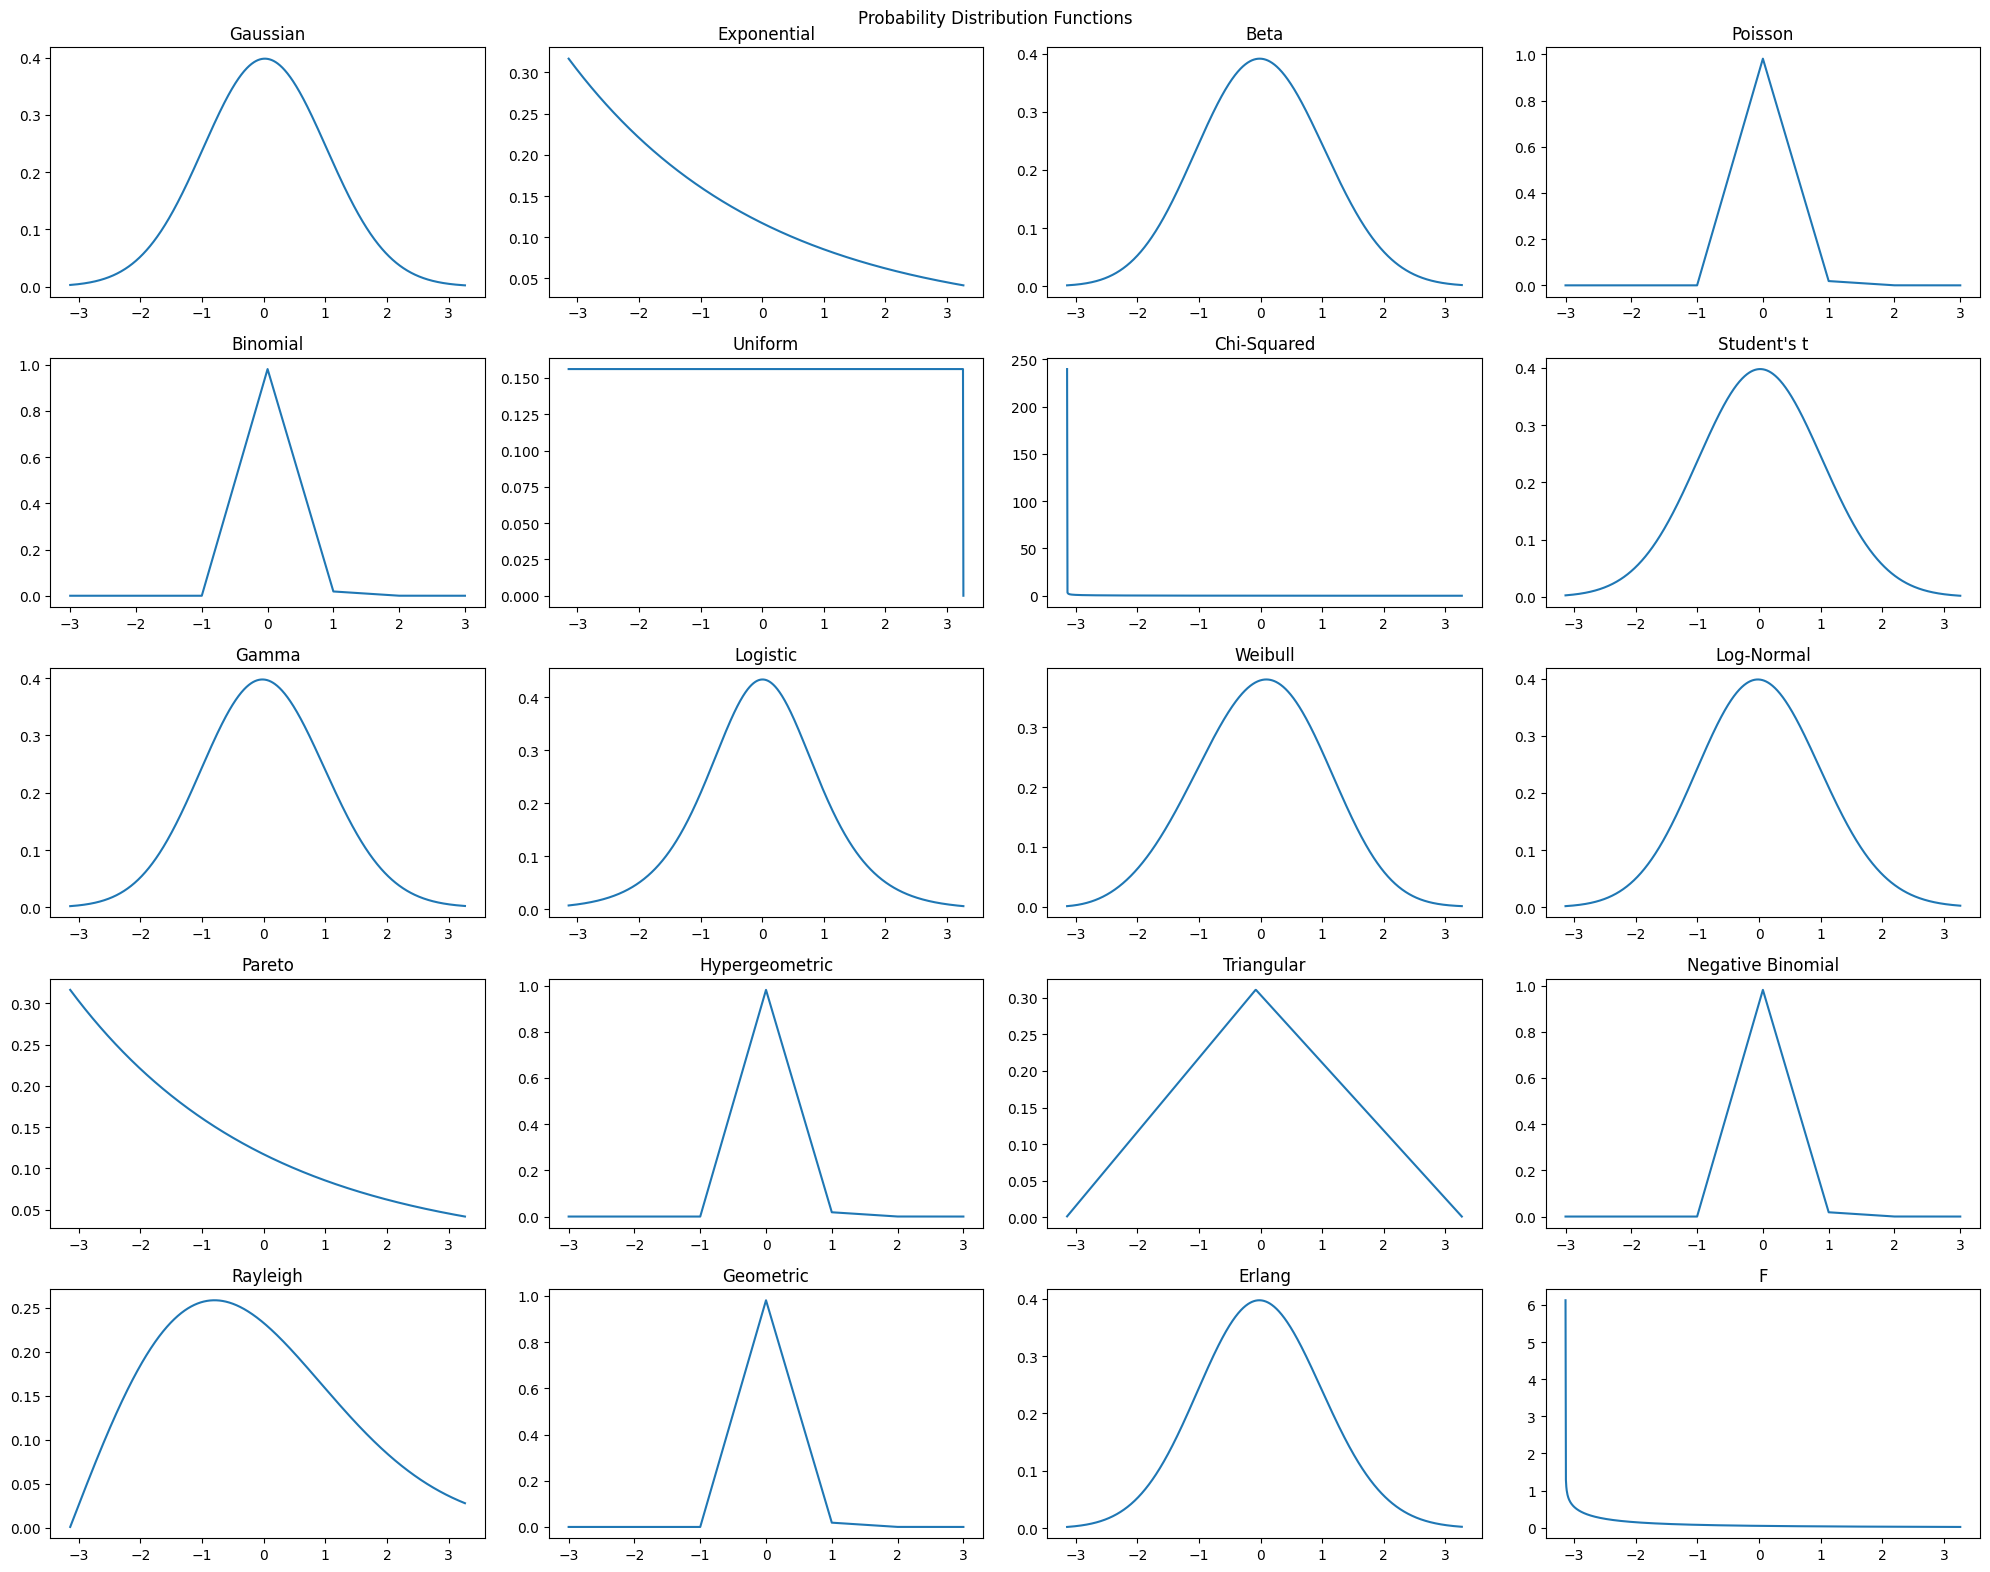

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_probability_distributions(tensor: torch.Tensor, num_points: int = 1000) -> None:
    """
    Plot probability distribution functions for the given tensor.

    Args:
        tensor (torch.Tensor): Input tensor.
        num_points (int): Number of points to generate for plotting (default: 1000).
    """
    # Convert tensor to numpy array
    data = tensor.numpy()

    # Generate x-axis points for plotting
    x = np.linspace(np.min(data), np.max(data), num_points)

    # Plot probability distribution functions
    fig, ax = plt.subplots(5, 4, figsize=(20, 16))
    fig.suptitle('Probability Distribution Functions')

    distributions = {
        'Gaussian': stats.norm,
        'Exponential': stats.expon,
        'Beta': stats.beta,
        'Poisson': stats.poisson,
        'Binomial': stats.binom,
        'Uniform': stats.uniform,
        'Chi-Squared': stats.chi2,
        'Student\'s t': stats.t,
        'Gamma': stats.gamma,
        'Logistic': stats.logistic,
        'Weibull': stats.weibull_min,
        'Log-Normal': stats.lognorm,
        'Pareto': stats.pareto,
        'Hypergeometric': stats.hypergeom,
        'Triangular': stats.triang,
        'Negative Binomial': stats.nbinom,
        'Rayleigh': stats.rayleigh,
        'Geometric': stats.geom,
        'Erlang': stats.erlang,
        'F': stats.f,
        # Add more distributions as needed
    }
# ... [rest of the code is unchanged] ...

# Fit and plot each distribution
    for i, (dist_name, dist) in enumerate(distributions.items()):
        try:
            ax_row, ax_col = divmod(i, 4)
            if dist_name in ['Poisson', 'Binomial', 'Hypergeometric', 'Negative Binomial', 'Geometric']:
                # Handle discrete distributions with manual parameter estimation
                if dist_name == 'Poisson':
                    rate = np.mean(data)
                    pmf = dist.pmf(np.round(x), rate)
                elif dist_name == 'Binomial':
                    # You need to know the number of trials (n) beforehand.
                    n = 10  # Example value for n
                    p = np.mean(data) / n
                    pmf = dist.pmf(np.round(x), n, p)
                # Add other discrete distributions here with their estimated parameters
                ax[ax_row, ax_col].plot(np.round(x), pmf, label=dist_name)
            else:
                # Fit continuous distributions as before
                params = dist.fit(data)
                pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
                ax[ax_row, ax_col].plot(x, pdf, label=dist_name)
            ax[ax_row, ax_col].set_title(dist_name)
        except Exception as e:
            print(f"Could not fit {dist_name} distribution: {e}")

# ... [rest of the code is unchanged] ...

    plt.tight_layout()
    plt.show()

# Example usage
tensor = torch.randn(1000)  # Generate a random tensor
plot_probability_distributions(tensor)


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Could not fit Poisson distribution: 'poisson_gen' object has no attribute 'fit'
Could not fit Binomial distribution: 'binom_gen' object has no attribute 'fit'
Could not fit Negative Binomial distribution: 'nbinom_gen' object has no attribute 'fit'
Could not fit Geometric distribution: 'geom_gen' object has no attribute 'fit'


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 162.66666666666669.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 160.66666666666669.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 163.11111111111114.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 162.33333333333337.
  warnings.warn(
c:\Users

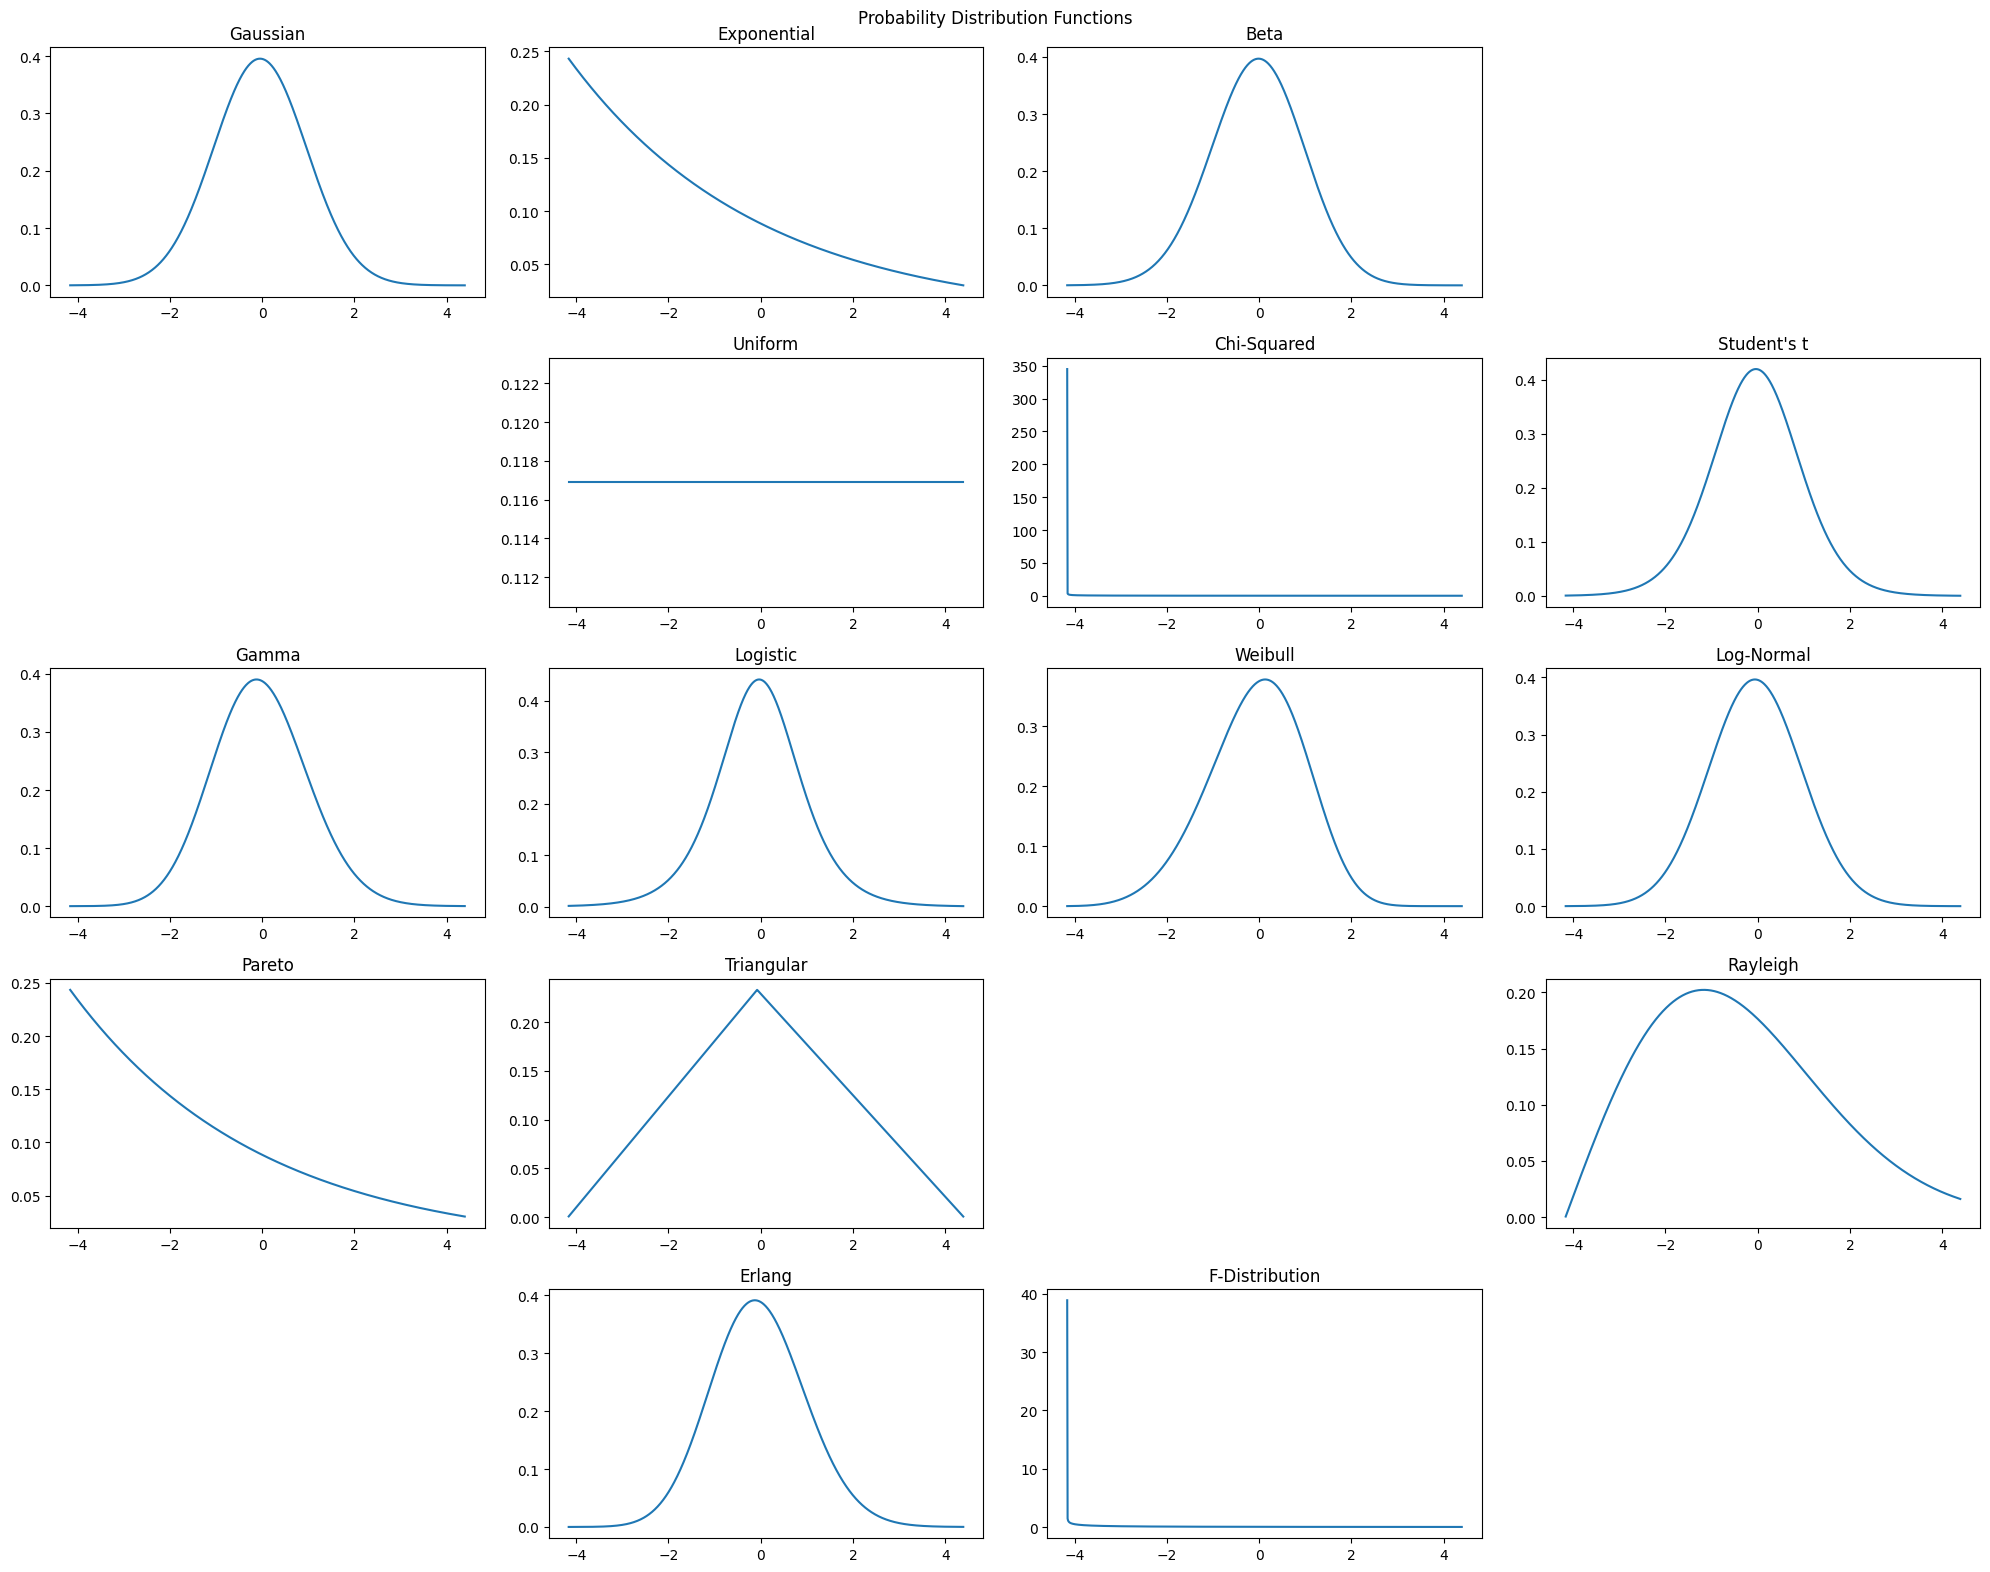

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_probability_distributions(tensor: torch.Tensor, num_points: int = 1000) -> None:
    """
    Plot probability distribution functions for the given tensor.

    Args:
        tensor (torch.Tensor): Input tensor.
        num_points (int): Number of points to generate for plotting (default: 1000).
    """
    # Convert tensor to numpy array
    data = tensor.numpy()

    # Generate x-axis points for plotting
    x = np.linspace(np.min(data), np.max(data), num_points)

    # Plot probability distribution functions
    fig, ax = plt.subplots(5, 4, figsize=(20, 16))  # Adjust dimensions as needed
    fig.suptitle('Probability Distribution Functions')

    distributions = {
        'Gaussian': stats.norm,
        'Exponential': stats.expon,
        'Beta': stats.beta,
        'Poisson': stats.poisson,
        'Binomial': stats.binom,
        'Uniform': stats.uniform,
        'Chi-Squared': stats.chi2,
        "Student's t": stats.t,
        'Gamma': stats.gamma,
        'Logistic': stats.logistic,
        'Weibull': stats.weibull_min,
        'Log-Normal': stats.lognorm,
        'Pareto': stats.pareto,
        # 'Hypergeometric': stats.hypergeom,  # This distribution might not fit well with continuous data
        'Triangular': stats.triang,
        'Negative Binomial': stats.nbinom,
        'Rayleigh': stats.rayleigh,
        'Geometric': stats.geom,
        'Erlang': stats.erlang,
        'F-Distribution': stats.f,
        # Add more distributions as needed
    }

    # Fit and plot each distribution
    for i, (dist_name, dist) in enumerate(distributions.items()):
        ax_row, ax_col = divmod(i, 4)
        try:
            # Special handling for distributions that require discrete or integer values
            if dist_name in ['Poisson', 'Binomial', 'Geometric', 'Hypergeometric', 'Negative Binomial']:
                data_to_fit = np.round(data).astype(int)
            else:
                data_to_fit = data

            # Fit the distribution to the data
            params = dist.fit(data_to_fit)
            
            # Generate the probability density function (PDF)
            if dist_name in ['Poisson', 'Binomial', 'Geometric', 'Hypergeometric', 'Negative Binomial']:
                pdf = dist.pmf(np.round(x), *params[:-2], loc=params[-2], scale=params[-1])
            else:
                pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

            # Plot the PDF
            ax[ax_row, ax_col].plot(x, pdf, label=dist_name)
            ax[ax_row, ax_col].set_title(dist_name)
        except Exception as e:
            print(f"Could not fit {dist_name} distribution: {e}")
            # Hide subplot if the distribution cannot be fitted
            ax[ax_row, ax_col].set_visible(False)

    # Hide any unused subplots
    for j in range(i+1, 5 * 4):
        ax_row, ax_col = divmod(j, 4)
        ax[ax_row, ax_col].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
tensor = torch.randn(1000)  # Generate a random tensor
plot_probability_distributions(tensor)


Could not fit Poisson distribution: _parse_args_rvs() missing 1 required positional argument: 'mu'
Could not fit Binomial distribution: _parse_args_rvs() missing 2 required positional arguments: 'n' and 'p'
Could not fit Hypergeometric distribution: _parse_args_rvs() missing 3 required positional arguments: 'M', 'n', and 'N'
Could not fit Negative Binomial distribution: _parse_args_rvs() missing 2 required positional arguments: 'n' and 'p'
Could not fit Geometric distribution: _parse_args_rvs() missing 1 required positional argument: 'p'


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 260.40000000000003.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 235.59999999999997.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 254.20000000000002.
  warnings.warn(
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 252.13333333333338.
  warnings.warn(
c:\Users

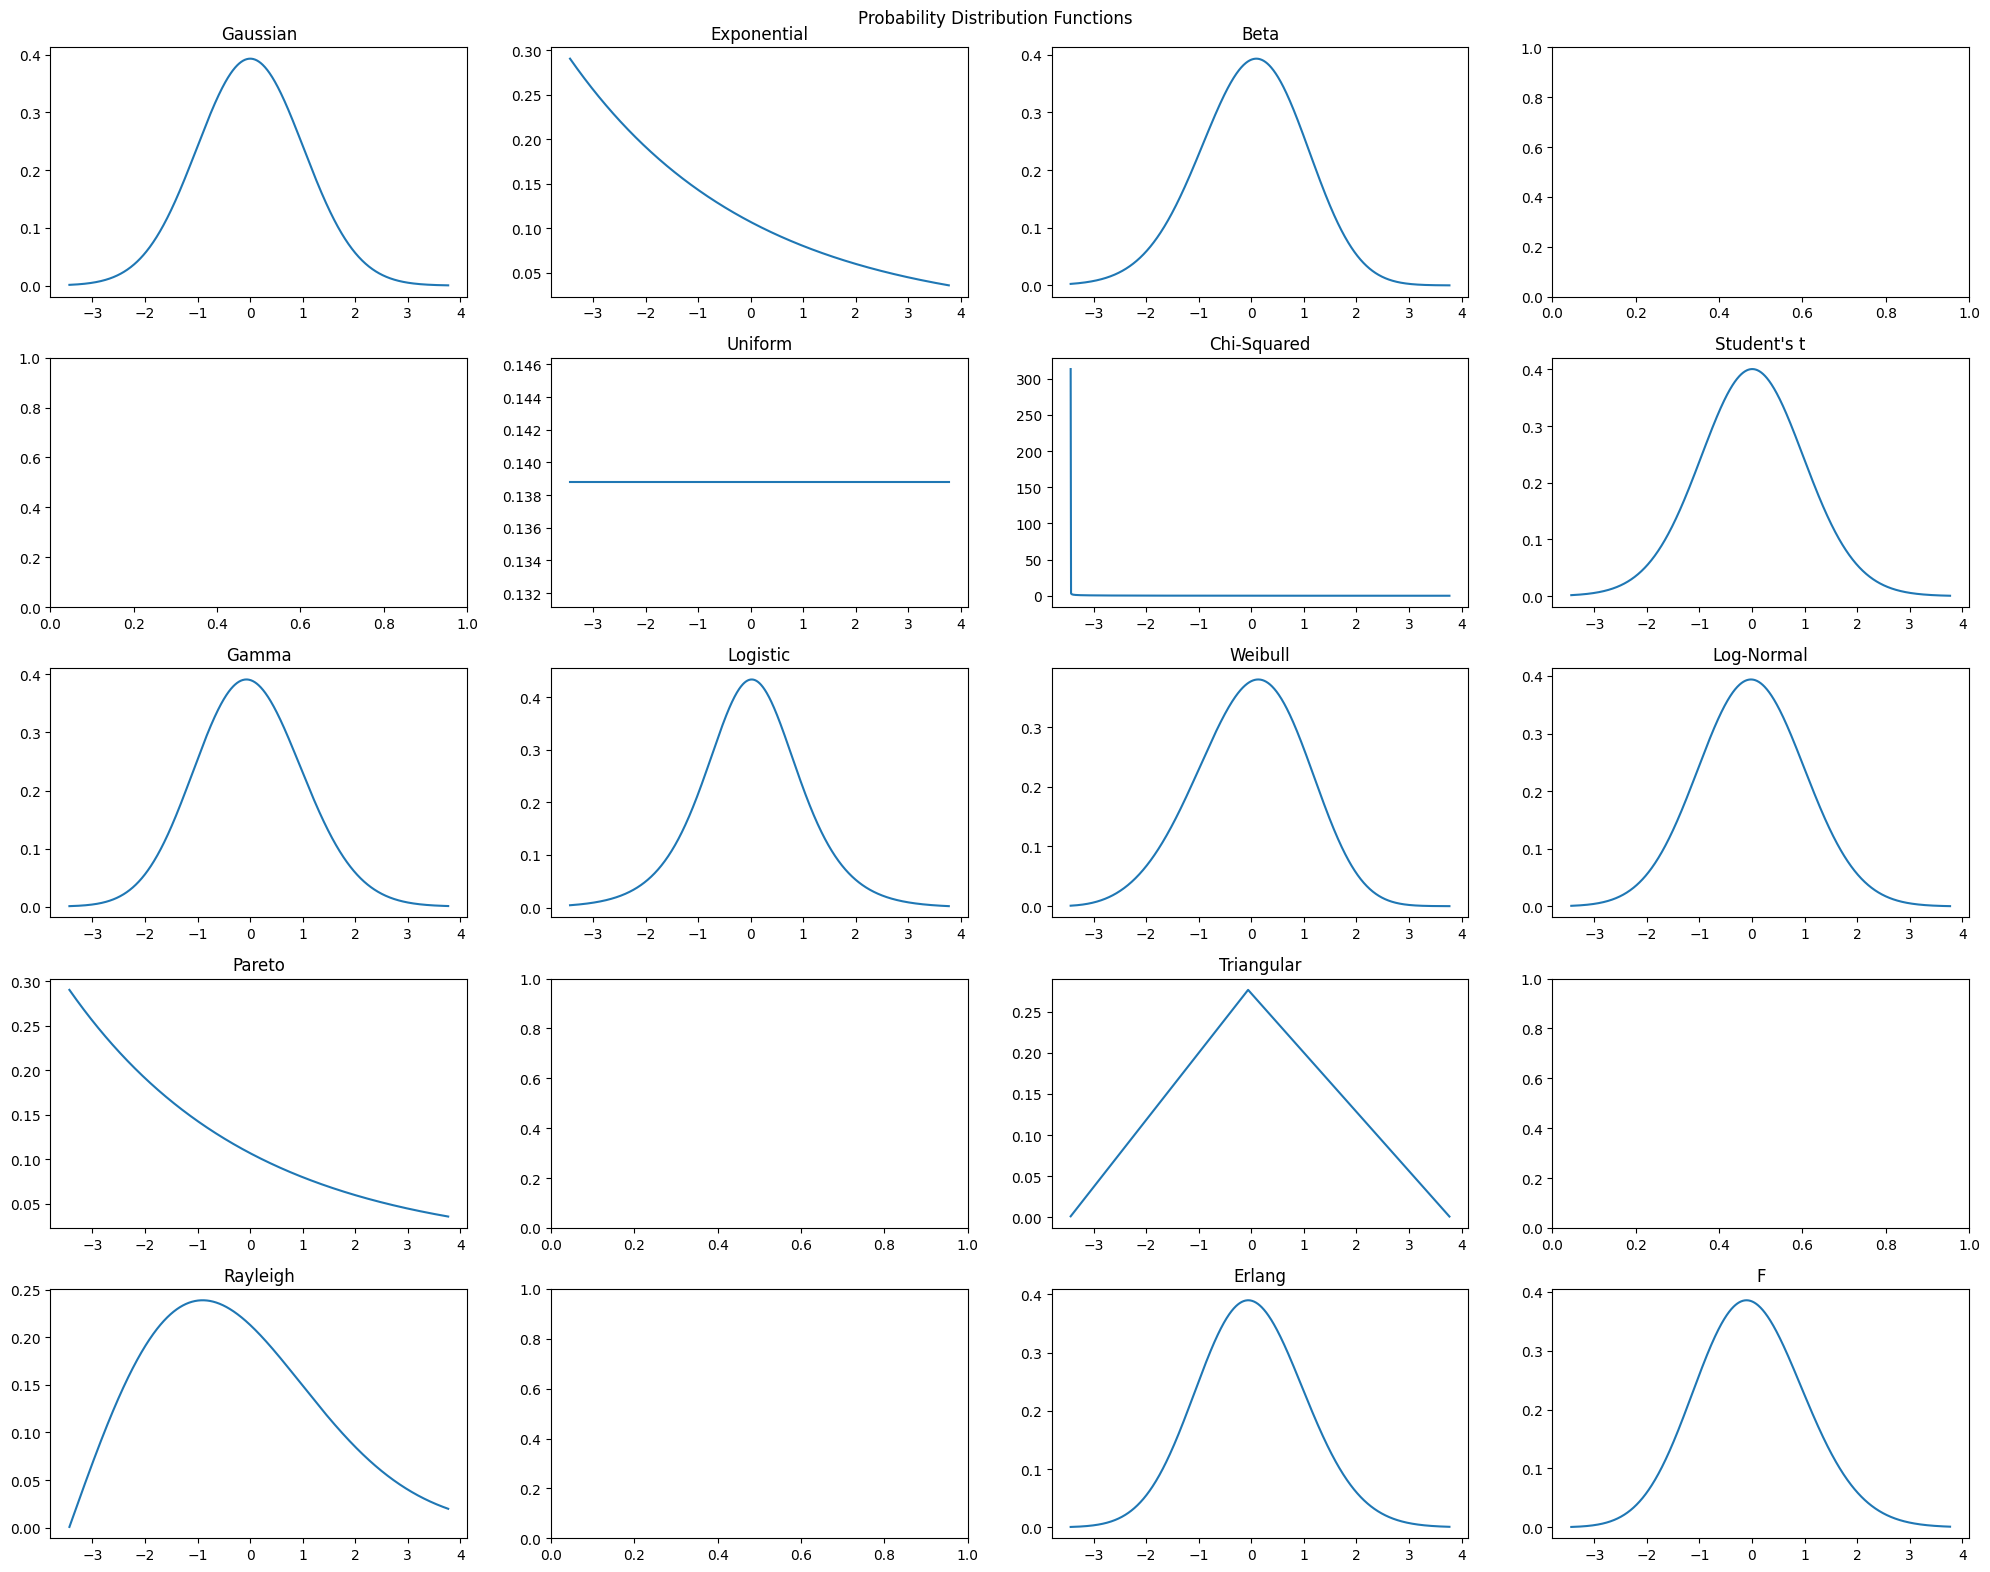

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_probability_distributions(tensor: torch.Tensor, num_points: int = 1000) -> None:
    """
    Plot probability distribution functions for the given tensor.

    Args:
        tensor (torch.Tensor): Input tensor.
        num_points (int): Number of points to generate for plotting (default: 1000).
    """
    # Convert tensor to numpy array
    data = tensor.numpy()

    # Generate x-axis points for plotting
    x = np.linspace(np.min(data), np.max(data), num_points)

    # Plot probability distribution functions
    fig, ax = plt.subplots(5, 4, figsize=(20, 16))
    fig.suptitle('Probability Distribution Functions')

    distributions = {
        'Gaussian': stats.norm,
        'Exponential': stats.expon,
        'Beta': stats.beta,
        'Poisson': stats.poisson,
        'Binomial': stats.binom,
        'Uniform': stats.uniform,
        'Chi-Squared': stats.chi2,
        'Student\'s t': stats.t,
        'Gamma': stats.gamma,
        'Logistic': stats.logistic,
        'Weibull': stats.weibull_min,
        'Log-Normal': stats.lognorm,
        'Pareto': stats.pareto,
        'Hypergeometric': stats.hypergeom,
        'Triangular': stats.triang,
        'Negative Binomial': stats.nbinom,
        'Rayleigh': stats.rayleigh,
        'Geometric': stats.geom,
        'Erlang': stats.erlang,
        'F': stats.f,
        # Add more distributions as needed
    }

    # Fit and plot each distribution
    for i, (dist_name, dist) in enumerate(distributions.items()):
        try:
            # Special handling for distributions that require discrete or integer values
            if dist_name in ['Poisson', 'Binomial', 'Hypergeometric', 'Negative Binomial', 'Geometric']:
                data_to_fit = np.round(data).astype(int)
                params = dist.rvs(size=len(data_to_fit))
                pdf = dist.pmf(np.round(x), *params)
            else:
                params = dist.fit(data)
                pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

            # Plot the PDF
            ax_row, ax_col = divmod(i, 4)
            ax[ax_row, ax_col].plot(x, pdf, label=dist_name)
            ax[ax_row, ax_col].set_title(dist_name)
        except Exception as e:
            print(f"Could not fit {dist_name} distribution: {e}")

    plt.tight_layout()
    plt.show()

# Example usage
tensor = torch.randn(1000)  # Generate a random tensor
plot_probability_distributions(tensor)
